In [1]:
import os, sys
sys.path.append('../')

In [2]:
import numpy as np 
import netCDF4 as nc
from dep.fire_detection.fd_c1 import fd_kaufman, fd_kennedy

In [31]:
from dep.fire_detection.fd_flasse_ceccato import fd_flasse_ceccato

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (12,7)

In [4]:
?fd_kaufman

Signature: fd_kaufman(ch3, ch4)
Docstring:
Kaufman et al. 1990 
Originally developed for fires in the Brazilian forests.
input: ch3, ch4
output: 1 for potential fire, 0 for no-fire
File:      d:\github\avhrr_tools\dep\fire_detection\fd_c1.py
Type:      function


In [5]:
fpath = 'D:/download/AVHRR-Land_19850104.nc'
with nc.Dataset(fpath, 'r') as ds:
    qa = ds.variables['QA'][0,:,:]
    b1 = ds.variables['SREFL_CH1'][0,:,:]  #650nm
    b2 = ds.variables['SREFL_CH2'][0,:,:]  #860nm
    b3 = ds.variables['BT_CH3'][0,:,:]     # 3750nm
    b4 = ds.variables['BT_CH4'][0,:,:]     # 11000nm
    b5 = ds.variables['BT_CH5'][0,:,:]     # 12000nm

In [13]:
b2 = np.where(b2.data <0, np.nan, b2.data)
b3 = np.where(b3.data <0, np.nan, b3.data)
b4 = np.where(b4.data <0, np.nan, b4.data)

# test fire detection efficiency

In [14]:
fdk = fd_kaufman(ch3 = b3, ch4 = b4)

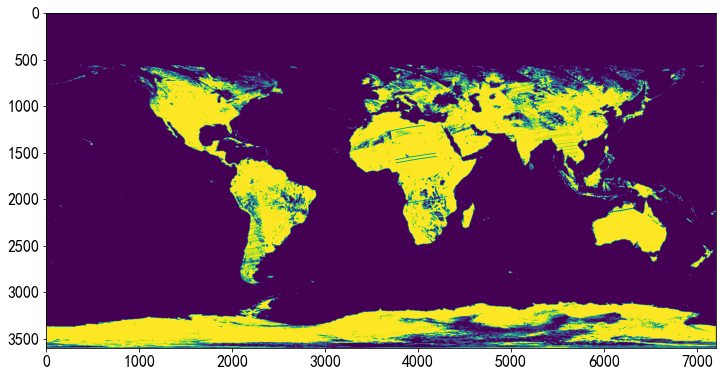

In [15]:
plt.imshow(fdk)

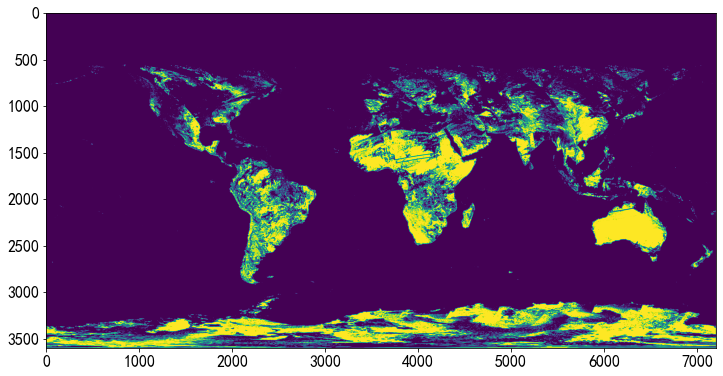

In [16]:
fdk = fd_kennedy(ch2 = b2, ch3 = b3, ch4 = b4)
plt.imshow(fdk)

In [17]:
t1 = [300,320,350,300]
t1 = np.array(t1)
t2 = [200, 250, 200, 200]
t2 = np.array(t2)

In [18]:
cond1 = t1 >= 316
cond2 = t2 >= 250

In [19]:
cond1

array([False,  True,  True, False])

In [20]:
cond2

array([False,  True, False, False])

In [ ]:
np.sum([cond1, cond2], axis = 0)

array([0, 2, 1, 0])

In [ ]:
cond = cond1 + cond2

In [ ]:
cond

array([False,  True,  True, False])

In [ ]:
np.where(cond >0, 1, 0)

array([0, 1, 1, 0])

In [ ]:
L, U = [3500, 1000]
R, D = [L+1000, U+1000]
ssb2 = b2[U:D, L:R]

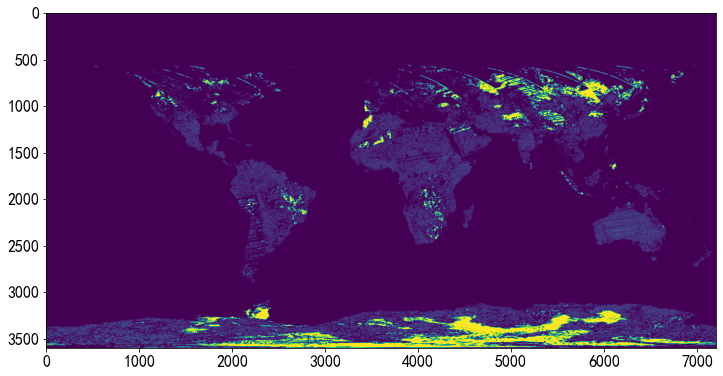

In [32]:
fdfc = fd_flasse_ceccato(ch2 = b2, ch3 = b3, ch4 = b4, window_size = 5)
plt.imshow(fdfc)

# use moving window filters

In [21]:
from scipy.ndimage import generic_filter

In [22]:
L, U = [3500, 1000]
R, D = [L+1000, U+1000]
ssb2 = b2[U:D, L:R]

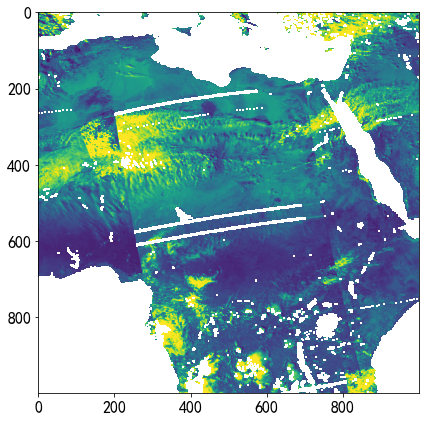

In [23]:
plt.imshow(ssb2)

In [27]:
def get_avg(arr):
    return np.mean(arr)
ssb2_avg = generic_filter(ssb2, function = get_avg, 
                         size = (15,15), mode = 'nearest')

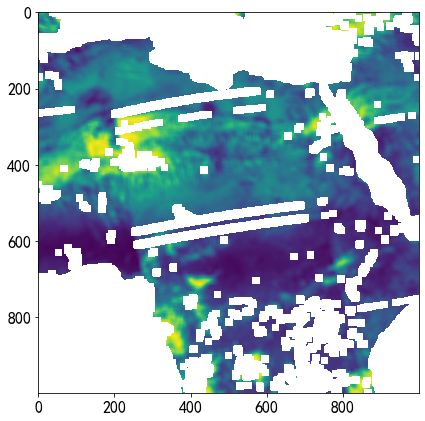

In [28]:
plt.imshow(ssb2_avg)

In [29]:
def get_std(arr):
    return np.std(arr)
ssb2_std = generic_filter(ssb2, function = get_std, 
                         size = (15,15), mode = 'nearest')

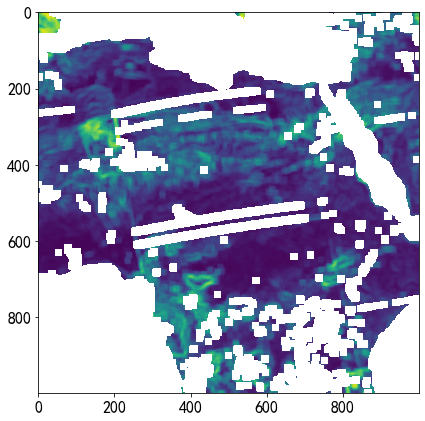

In [30]:
plt.imshow(ssb2_std)